# CAP 5768 - Data Science - Dr. Marques - Fall 2019

Christian Garbin

## Assignment 3: Statistical analysis - Part 1

### Goals 

- To transition from data analytics to basic statistical analysis.
- To practice the computation and displaying of summary statistics, percentiles, PMFs and (E)CDFs.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets. 
- To display and interpret bee swarm plots and box-and-whisker plots.
- To visualize and compute pairwise correlations among variables in the dataset.


### Instructions

- This assignment is structured as a single block, using the same dataset throughout.
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 107 (plus up to 25 bonus points).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 

-------------------
## The Iris dataset

![Iris.png](notebook_images/iris.png)

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.
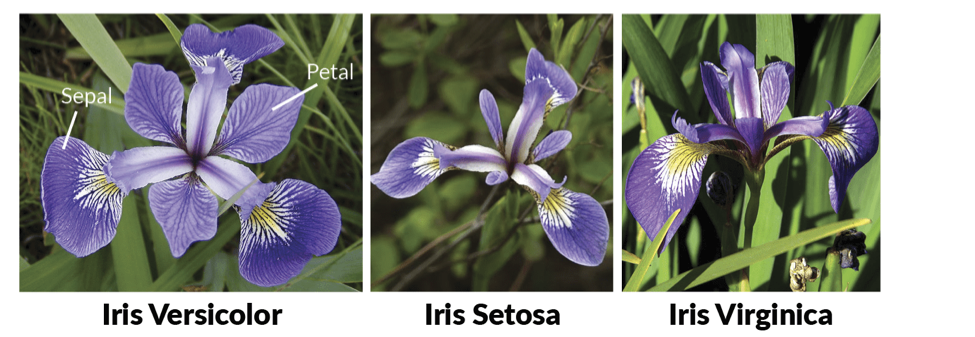

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To validate the certificate when downloading
# see https://stackoverflow.com/a/60671292
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Histogram and summary statistics 

The code below can be used to display the histogram of versicolor petal lengths (with meaningful labels for the axes and default option for number of bins). 

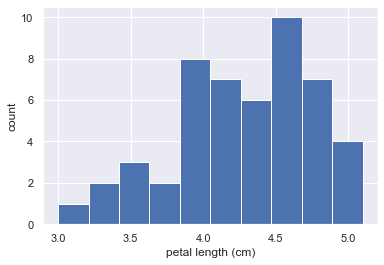

In [2]:
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()


## Your turn! (12 points)

Write code to:

1. Modify the histogram above, this time using the "square root rule" for the number of bins. (4 pts)

*The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.*

2. Modify the histogram above, such that the y axis shows probability/proportion (rather than absolute count), i.e., a proper PMF. (4 pts) 

3. Compute summary statistics (2 pts each): mean and standard deviation 

## Solution

### 1. Modify the histogram above, this time using the "square root rule" for the number of bins. (4 pts)

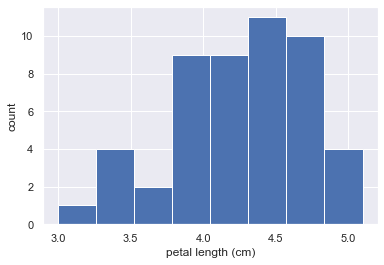

In [3]:
plt.hist(versicolor_petal_length, bins='sqrt')
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

### 2. Modify the histogram above, such that the y axis shows probability/proportion (rather than absolute count), i.e., a proper PMF. (4 pts)

How this is done: 

* Instead of using the actual value of each sample, we use the _weight_ of each sample.
* The _weight_ of each sample is simply its percentage in the number of samples.
* Given that we have 50 samples, each sample contributes 2% of the weight.
* Once we plot it as a histogram, the 2% of the weight of each sample is accumulated in its corresponding bin, so each bin adds up to the total weight (percentage) of samples that are in that bin.

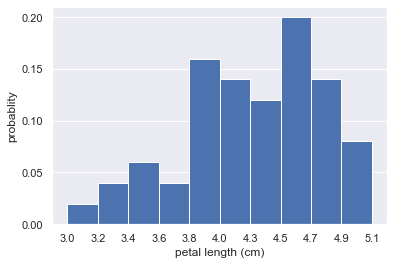

In [4]:
from matplotlib.ticker import StrMethodFormatter

# Start with a "1" for each sample, i.e. 50 x 1's, and divide by
# the number of samples - each entry is now 1/50, i.e. the weight
# of each sample (2%)
N = len(versicolor_petal_length)
sample_pct = np.ones(N) / N

_, bins, _ = plt.hist(versicolor_petal_length, weights=sample_pct)
plt.xlabel('petal length (cm)')
plt.ylabel('probablity')

# Format y label: fewer values, easier to follow across the graph
ax = plt.gca()
ax.set_yticks(ax.get_yticks()[::2])

# Format x label: show the range of values for each bin
# Also remove the x grid because the bars themselves guide the eyes
ax.xaxis.grid(False)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
plt.xticks(bins);

Another way of doing it: change the y labels.

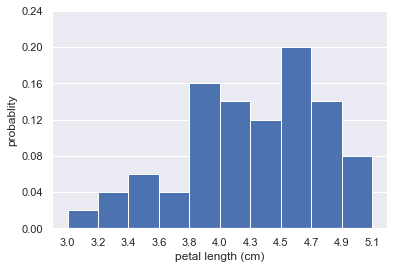

In [5]:
_, bins, _ = plt.hist(versicolor_petal_length)
plt.xlabel('petal length (cm)')
plt.ylabel('probablity')

# Format y label: change to probability (percentage)
# Don't change the number of ticks because in this case they
# are not nicely aligned to multiples of five (as the one above)
ax = plt.gca()
y_ticks = ax.get_yticks()
# Set ticks to same value to avoid warning - https://stackoverflow.com/a/63748297
ax.yaxis.set_ticks(y_ticks)
ax.set_yticklabels(['{:0.2f}'.format(x/N) for x in y_ticks])

# Format x label: show the range of values for each bin
# Also remove the x grid because the bars themselves guide the eyes
ax.xaxis.grid(False)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
plt.xticks(bins);

Which method to use?

Both results in about the same visual presentation, with the minor difference of the number of ticks in the y axis.

The decision can be approached from two sides:

1. If we only care about the visual aspects, the second solution (changing the labels) will use less memory. This may be important for large datasets.
1. If we care about the data used to construct the graph, the first solution (using weights), results in precise binning data from the returned parameters of the [`hist`function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html).

As a general guideline, I would start with the second solution, changing the labels, because it's more scalable.

### 3. Compute summary statistics (2 pts each): mean and standard deviation

It's not clear in the question if we should summarize only the dataset we used for the histogram or all of them. To be thorough, and to practice, we will do both, versicolor and all of them.

In [6]:
print('Versicolor mean length is {:.2f} cm and the standard deviation is {:.2f} cm' \
      .format(versicolor_petal_length.mean(), versicolor_petal_length.std()))

Versicolor mean length is 4.26 cm and the standard deviation is 0.47 cm


In [7]:
with pd.option_context('display.float_format', '{:0.2f} cm'.format ):
    display(iris.pivot_table(
        'petal_length', index='species', aggfunc=['mean', 'std']))

,mean,std
,petal_length,petal_length
species,,
setosa,1.46 cm,0.17 cm
versicolor,4.26 cm,0.47 cm
virginica,5.55 cm,0.55 cm


## Your turn! (6 points)

Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species (properly labeld), and the y-axis the petal lengths. 


Your plot should look like this:

![iris_beeswarm.png](notebook_images/iris-swarmplot.png)
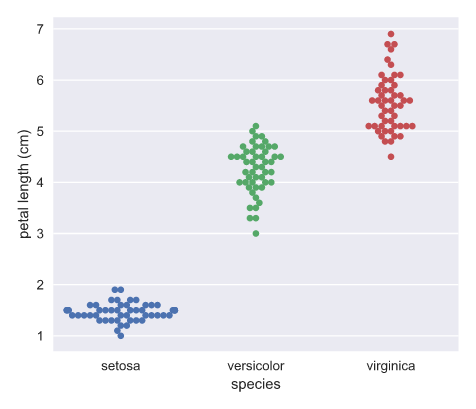

## Solution

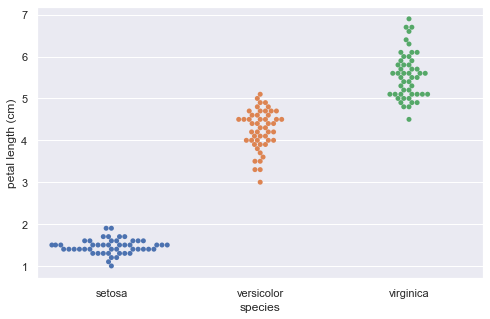

In [8]:
# Empirical: set size to have a nice spread of the dots
# That way can see the distribution better (fewer dots overlap)
plt.figure(figsize=(8, 5))

ax = sns.swarmplot(x='species', y='petal_length', data=iris)
ax.set_ylabel('petal length (cm)');

## Questions 1-2 (12 points, i.e. 6 pts each)

1. Explain the "binning bias" associated with histogram plots.

2. What is a bee swarm plot and in which situations should you (not) use it?

## Solution

(ENTER YOUR ANSWER HERE)

### 1. Explain the "binning bias" associated with histogram plots.

The "binning bias" is the significant change in the visualization of a distribution that results from the number of bins used in the histogram. In extreme cases, it may change the interpretation of the underlying distribution. For example, a small number of bins may make a normal distribution look like a uniform distribution.

To illustrate the effect we will use a bimodal distribution created by combining two overlapping normal distributions, one with a peak (mode) at 10 and one with a peak (mode) at 30.

In [9]:
# To get consistent results
np.random.seed(42)
# Oversample the distribution with the larger standard
# deviation to have peaks of about the same height
bimodal_sample = np.concatenate(
    [np.random.normal(10, 3, 500), np.random.normal(30, 10, 2000)])

The graph below shows the actual distribution of the sample. A good histogram should show similar features.

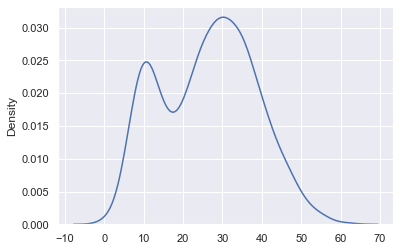

In [10]:
sns.kdeplot(bimodal_sample);

Plotting the distribution with 5, 10, 20, 30, with the "square root rule", and with the default number of bins shows that:

* With five bins we cannot see the real distribution. It looks like one normal distribution, skewed to the right.
* At ten bins it still looks like a normal distribution, but now shows a bin that looks like an outlier. That peak is the mode of the first normal distribution, but it is not clear with this number of bins.
* At twenty bins we begin to see the two peaks of a bimodal distribution. 
* Once we reach thirty, it is clearer we are dealing with a bimodal distribution.
* When plotting with `sqrt` bin algorithm (second to last graph), we can see immediately that we have a bimodal distribution. The title of this graph shows how many bins the algorithm chose.
* The default number of bins from `hist` (last graph) turned out to be ten. It has, therefore, the same problems discussed above for the ten bins case.

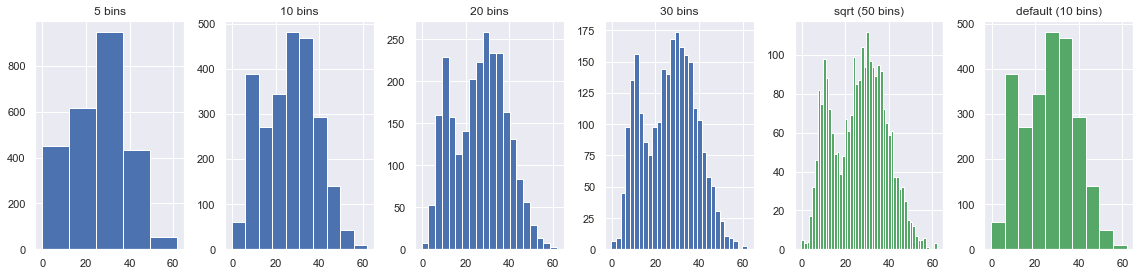

In [11]:
# The number of bins we will try
bins = [5, 10, 20, 30]
bins_to_try = len(bins)

# Enough subplots for the number of bins
# to try + sqrt + default number of bins
fig, ax = plt.subplots(1, bins_to_try+2, figsize=(4*bins_to_try, 4),
                       tight_layout=True)

# Plot the bins we want to try
for i, b in enumerate(bins):
    ax[i].hist(bimodal_sample, bins=b, color='b')
    ax[i].set_title('{} bins'.format(b))

# Plot the `sqrt` number of bins
n, _, _ = ax[bins_to_try].hist(bimodal_sample,
                                       bins='sqrt', color='g')
ax[bins_to_try].set_title('sqrt ({} bins)'.format(len(n)))

# Plot the default number of bins
n, _, _ = ax[bins_to_try+1].hist(bimodal_sample, color='g')
ax[bins_to_try+1].set_title('default ({} bins)'.format(len(n)));

The number of bins also illustrates the bias/variance tradeoff when constructing the graph. A histogram with the optimal number of bins would place new samples in the correct bin most of the time (low bias), which would preserve the overall shape of the histogram (low variance), which, in turn, would closely resemble the distribution of the dataset from where we drew that sample. [Since we cannot achieve both low bias and low variance](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff), the best we can do is to balance them out.

In the example above, we can see that the `sqrt` algorithm is already exhibiting high variance. It shows a fluctuation of peaks around the mode. The graph with thirty bins is more resilient to variance, while still representing the underlying distribution (more on histogram bias/variance [here](https://stats.stackexchange.com/questions/339194/can-the-bin-size-in-a-histogram-be-thought-of-as-a-regularity-constraint) and [here](https://www.researchgate.net/post/What_metric_best_captures_the_information_loss_when_binning_a_large_data-set_into_a_histogram_representation)).

Some lessons learned in this experiment:

1. Before attempting a histogram, try to determine the actual distribution with a PDF plot, e.g. KDE - the number of bins used in the histogram should approximate this PDF.
1. The default number of bins from `hist` is far from the best choice.
1. Start with a bin-finder technique, e.g. `sqrt`. They do a decent job of picking a number of bins that expose the underlying distribution.
1. Using the number of bins from the previous step, experiment with other values to find a balance between bias and variance.

### 2. What is a bee swarm plot and in which situations should you (not) use it?

A visualization technique that shows the distribution of the data points in a way that preserves the actual data. It allows a visual comparison of the summary statistic of the categories (max, min, mean, mode, and outliers).

It is useful for a small number of categories and a relatively small number of data points. 

It is not useful when there is a large number of categories or a large number of data points in the categories.

The swarm plot below is a (contrived) example of a large number of samples and a large number of categories, plotted with `swarmplot` default values (which works fairly well for a small number of categories, as we saw above with the real iris data).

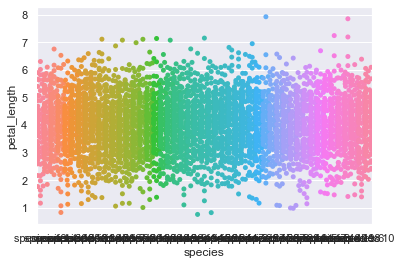

In [12]:
# Suppress Seaborn warning caused by badly formatted graph (for the
# data we need to plot) - the format will be change later, which
# indirectly fixes the warnigns
import warnings

np.random.seed(42)
fake_iris = pd.DataFrame(data={
    'petal_length': [np.random.normal()+4 for _ in range(5000)],
    'species': ['species {}'.format(np.random.randint(1, 50)) for _ in range(5000)]})
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.swarmplot(x='species', y='petal_length', data=fake_iris);

There are several problems with this graph:

* The width is too small, overlapping the dots of adjacent categories.
* The color palette makes it difficult to distinguish the dots for adjacent categories.
* The labels are unreadable.

Some of these problems can be fixed with minor tweaks to the graph.

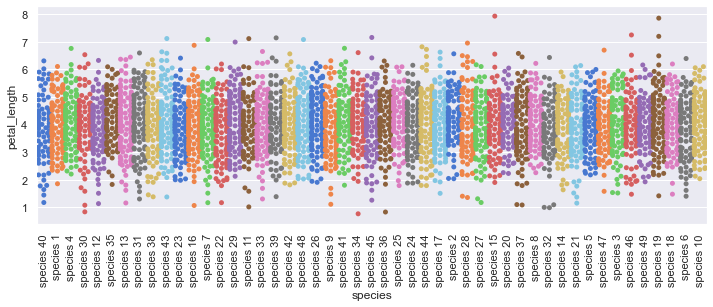

In [13]:
# Make the graph wider to separate the categories
plt.figure(figsize=(12, 4))
# Set a qualitative color palette to distinguish adjacent categories
# (see https://seaborn.pydata.org/tutorial/color_palettes.html)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.swarmplot(x='species', y='petal_length', data=fake_iris, palette='muted')
# Rotate labels to make them readable
plt.xticks(rotation=90);

However, even with these adjustments, the plot is less than ideal. We are not able to take advantage of the features of the swarm plot with this many categories.

Once we reach this complexity, we are better off with a different type of plot, e.g. a box plot.

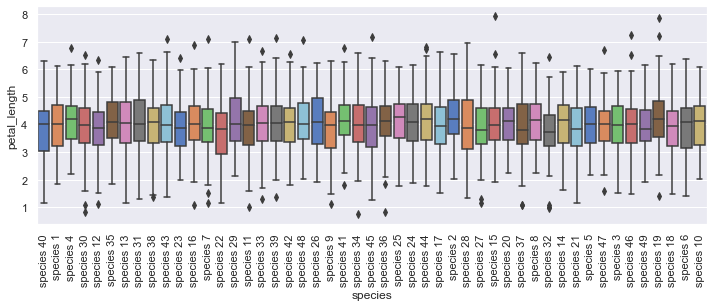

In [14]:
plt.figure(figsize=(12, 4))
ax = sns.boxplot(x='species', y='petal_length', data=fake_iris, palette='muted')
plt.xticks(rotation=90);

## Empirical Cumulative Distribution Function (ECDF)

The function below takes as input a 1D array of data and then returns the x and y values of the ECDF.

In [15]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

## Your turn! (12 points)

Use the ``ecdf()`` function above to compute the ECDF for the petal lengths of the Iris versicolor flowers (6 pts) and plot the resulting ECDF (6 pts).

Your plot should look like this:

![ecdf_versicolorpng.png](notebook_images/ecdf-versicolor.png)
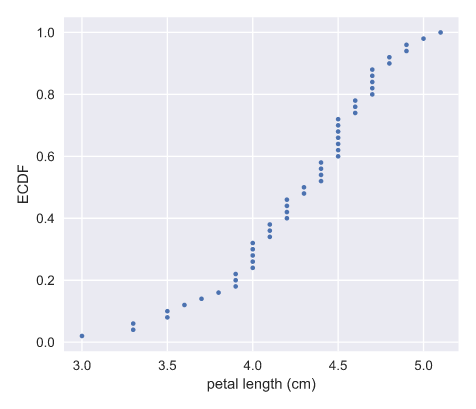

## Solution

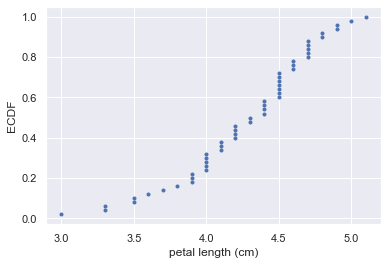

In [16]:
x, y = ecdf(versicolor_petal_length)
plt.scatter(x, y, marker='.')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF');

## Your turn! (8 points)

Write code to plot ECDFs for the petal lengths of all three iris species.

Your plot should look like this:

![ECDFs_Iris.png](notebook_images/ecdf-iris.png)
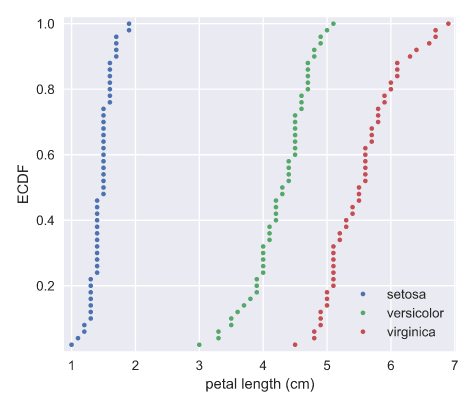

## Solution

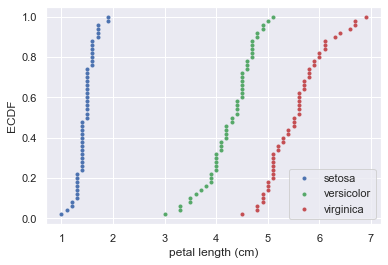

In [17]:
def plot_iris_ecdf(show_percentiles=False):
    species = iris.species.unique()
    colors = ['b', 'g', 'r']

    for s, c in zip(species, colors):
        petal_length = iris[iris.species == s].petal_length
        x, y = ecdf(petal_length)
        plt.scatter(x, y, marker='.', label=s, color=c)
    
        if show_percentiles:
            percentiles = np.array([25, 50, 75])
            p = np.percentile(petal_length, np.array([25, 50, 75]))
            plt.plot(p, percentiles/100, marker='D', color='red',
                     linestyle='none')

    plt.xlabel('petal length (cm)')
    plt.ylabel('ECDF')
    plt.legend()
    
plot_iris_ecdf()

## Percentiles

The code below computes the 25th, 50th, and 75th percentiles for the petal lengths of the Iris versicolor species and overlays the results on top of the ECDF.

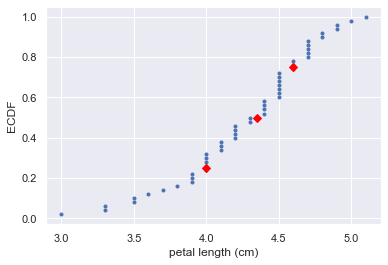

In [18]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
ptiles_versicolor = np.percentile(versicolor_petal_length, percentiles)

# Compute ECDF
x_vers, y_vers = ecdf(versicolor_petal_length)
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

## Your turn! (10 points)

Write code to compute the 25th, 50th, and 75th percentiles for the petal lengths of and plot the resulting values overlaid with the corresponding ECDFs for all three iris species.


## Solution

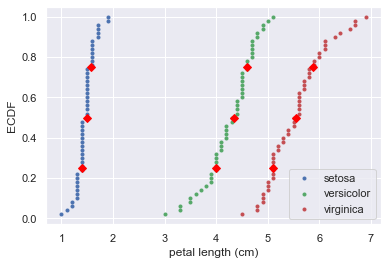

In [19]:
plot_iris_ecdf(True)

For this case, setting the y-axis grid lines at the percentiles and removing all other grid lines seems to make finding the percentlies easier.

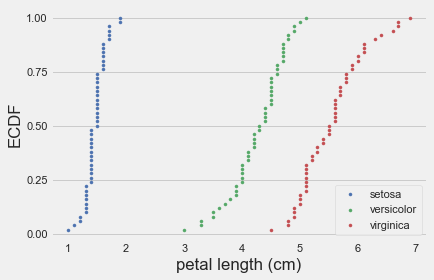

In [20]:
with plt.style.context('fivethirtyeight'):
    plot_iris_ecdf(False)
    plt.gca().xaxis.grid(False)
    plt.yticks([0, 0.25, 0.5, 0.75, 1.0]);

## Box-and-whisker plots

Box-and-whisker plots (or simply box plots) show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

![Box_plot.png](notebook_images/box-plot.png)
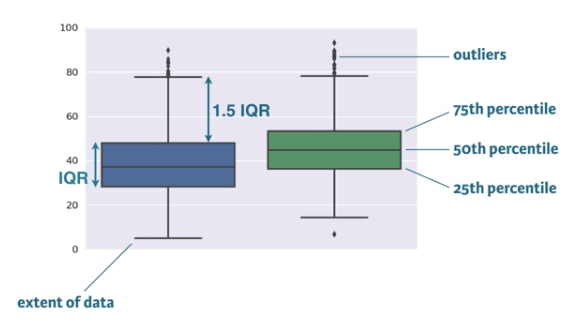

## Your turn! (10 points)

Write code to display the box-and-whisker plot for the petal lengths of all three iris species.

Your plot should look like this:

![Iris_boxplot.png](notebook_images/box-plot-iris.png)
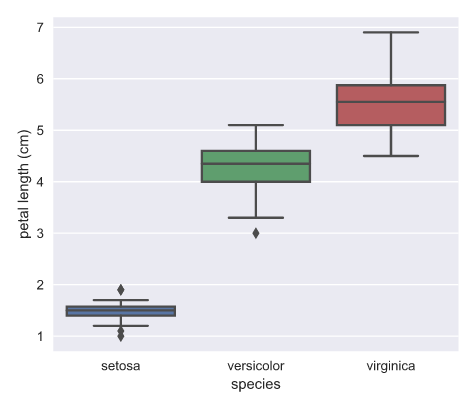

## Solution

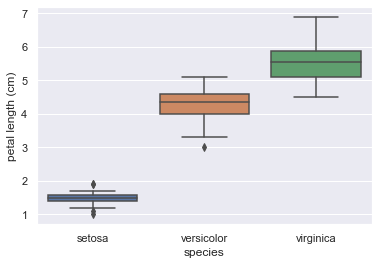

In [21]:
ax = sns.boxplot(x='species', y='petal_length', data=iris)
ax.set_ylabel('petal length (cm)');

## Questions 3-4 (6 points, i.e. 3 pts each)

3. Which species has the largest/smallest standard deviation?
4. Which species has the largest/smallest number of outliers?

## Solution

### 3. Which species has the largest/smallest standard deviation?

Visually: setosa is the smallest and virginica is the largest.
    
Programatically:

In [22]:
iris_std = iris.groupby('species')['petal_length'].std().sort_values()
print('Smallest std: {}, {:.2f} cm'.format(iris_std.index[0], iris_std[0]))
print('Largest std: {}, {:.2f} cm'.format(iris_std[-1:].index[0], iris_std[-1:][0]))

Smallest std: setosa, 0.17 cm
Largest std: virginica, 0.55 cm


### 4. Which species has the largest/smallest number of outliers?

Visually: virginica has the smallest number of outliers and setosa has the largest.

Programatically:

In [23]:
# Based on https://stackoverflow.com/a/48995802/336802
def flag_outliers(df, column='petal_length'):
    '''Return a new DataFrame with an 'outlier' column with True/False'''
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Why `assign`: to avoid changing `df` because it may be a
    # copy of a DataFrame, which causes SettingWithCopyWarning
    # http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
    # And also because modifying the original parameters of a
    # function is bad form (hidden side effect)
    return df.assign(outlier=~df[column].between(q1 - 1.5*iqr, q3 + 1.5*iqr))


# Calculate outlier for each species separately and
# put them back together into one DataFrame
# Not very effficient for large DataFrames, but ok for small ones
outliers = pd.DataFrame()
for s in iris.species.unique():
    outliers = pd.concat([outliers, flag_outliers(iris.loc[iris.species == s])])

# The following block of code could be done in one line - split for clarity
# True/False outlier count for the column we are interested in
sepal_length_outliers = outliers.groupby(
    ['species', 'outlier'])['sepal_length'].count()
# This `unstack` adds the species that don't have any outlier
# Without it, they are not listed
sepal_length_outliers = sepal_length_outliers.unstack(fill_value=0)
# Now filter and sort for the outliers only (outlier=True)
sepal_length_outliers = sepal_length_outliers[True].sort_values()

print('Smallest number of outliers: {}, with {} outliers'.format(
    sepal_length_outliers.index[0], sepal_length_outliers[0]))
print('Largest number of outliers: {}, with {} outliers'.format(
    sepal_length_outliers.index[-1], sepal_length_outliers[-1]))


Smallest number of outliers: virginica, with 0 outliers
Largest number of outliers: setosa, with 4 outliers


## Bonus! (10 points)

Write code to display the box-and-whisker plot combined with the bee swarm plot for the petal lengths of all three iris species.

## Solution

The graph puts the petal length in the x axis to expand _setosa_. Otherwise we cannot see the details of the swarm plot. We could have made the graph taller, but making it wider seems to be better use of the space, without compromising the visualization of the data.

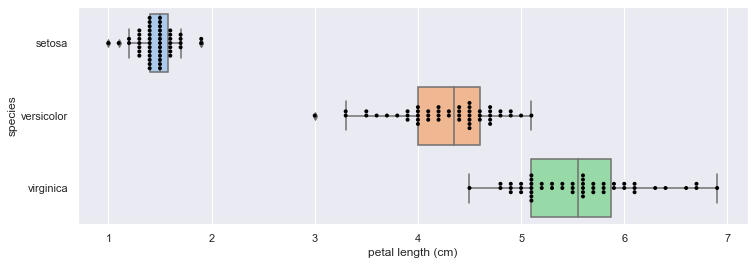

In [24]:
# Make it a wide graph
plt.figure(figsize=(12, 4))
# Plot horizontally, with `pastel` palette to make it easier to
# see the dots of the swarmplot
sns.boxplot(x='petal_length', y='species', data=iris, orient='h',
            palette='pastel')
sns.swarmplot(x='petal_length', y='species', data=iris, color='black', s=4)
plt.xlabel('petal length (cm)');

## Scatter plots, pair plots, and correlation between two variables

The code below:

1. Displays the pair plots for all (4) attributes for all (3) categories/species/classes in the Iris dataset.
2. Computes the covariance matrix for the versicolor species.
3. Computes the Pearson correlation coefficient between petal length and petal width for the versicolor species.


Pearson correlation coefficient between petal length and petal width for versicolor species: 0.78667


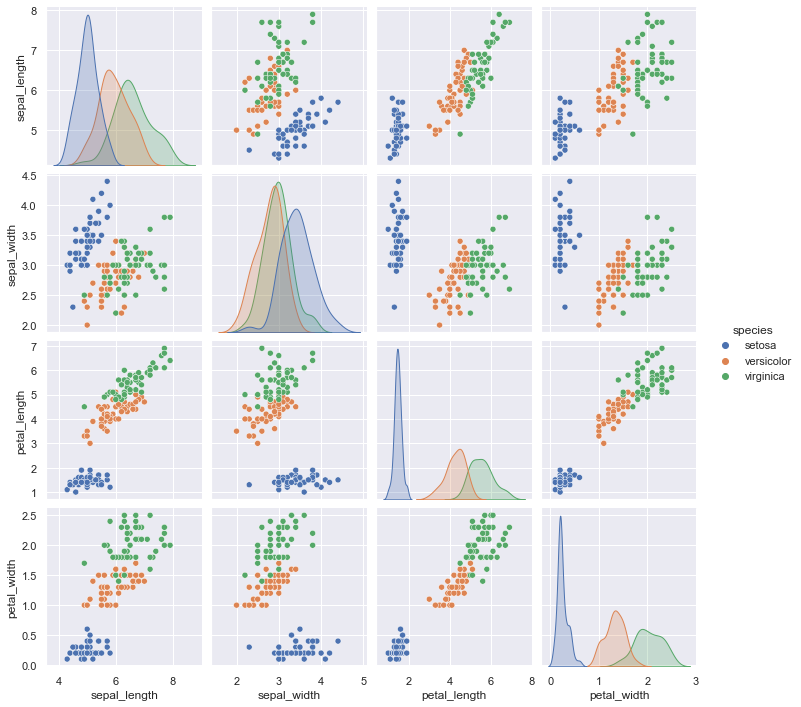

In [25]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Compute 1D arrays for petal length and width
versicolor_petal_width = iris[iris.species == 'versicolor'].petal_width
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print('Pearson correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(r))

## Bonus! (15 points)

Extend the code above to compute the Pearson correlation coeficients for all pair-wise combinations of all three Iris species and display the results in a table format.

## Solution

In [26]:
import itertools

def show_all_correlations(corr_function):
    '''Calculate correlation between two variables (columns) in the iris
    table using the given `corr_function` and show the correlation table.
    The correlation function must take two paramaters (variables to compare)
    and return one correlation value (between those two variables).'''

    # All species
    species = iris.species.unique()

    # All columns that have measurements
    measurements = list(iris.columns)
    measurements.remove('species')

    # A multi-index DataFrame to store the results
    # rows -> species and measurements (two indices)
    # columns -> measurements
    # cells -> corr_function() for each row/column combination
    correlations = pd.DataFrame(
        index=pd.MultiIndex.from_product([species, measurements]),
        columns=measurements)

    # Pair-wise permutation of measurements
    # Because corr_function(a,b) == corr_function(b,a) we could use
    # only combinations
    # We are using permutations to get a more pleasant table (easier to read)
    measurements_pairs = list(itertools.permutations(measurements, 2))

    # Calculate correlation for each species
    for s in species:
        iris_species = iris[iris.species == s]
        for p in measurements_pairs:
            corr = corr_function(iris_species[p[0]], iris_species[p[1]])
            correlations.loc[(s, p[0])][p[1]] = corr

    # Clean up the cells that don't have correlations (the measurement
    # against itself, e.g. sepal_length vs. sepal_length)
    correlations.fillna('', inplace=True)

    def highlight(s):
        # For consistency, use seaborn colors from the graphs above (`deep` palette)
        # Values from https://github.com/mwaskom/seaborn/blob/master/seaborn/palettes.py
        colors = {'setosa': '#4C72B0',
                  'versicolor': '#DD8452', 'virginica': '#55A868'}
        # `name` has the name of a Series, which in this case is the multi-index
        # (species, measurement) - we want the species, i.e. name[0]
        return ['background-color: {}'.format(colors[s.name[0]])]*len(s)

    display(correlations.style.format(
        # Format the correlation values, skipping the empty cells
        # If we don't test for str(), format fails on the '' cells
        lambda x: '{:0.2f}'.format(x) if str(x) else '') \
        # Color-code by species because the species name is not aligned with
        # corresponding cells when multiple indices are used
        # See https://github.com/pandas-dev/pandas/issues/15379
        .apply(highlight, axis='columns'))
    
show_all_correlations(pearson_r)

The next cell is used to export to PDF. Styled Pandas DataFrames are not exported to PDF. The cell below shows a .png saved from the cell above. The .png is exported correctly to PDF.

![Pearson all species](notebook_images/pearson-all-species.png)

## Question 5 (6 points)

5. Should the Pearson correlation coefficient be replaced with the Spearman rank-order correlation coefficient in this case? Why (not)?

## Solution

### 5. Should the Pearson correlation coefficient be replaced with the Spearman rank-order correlation coefficient in this case? Why (not)?

The short answer: for the Iris dataset Pearson and Spearman correlation coefficients perform about the same, so there is no need to replace Pearson.

The long answer...

According to [Think Stats 2](https://greenteapress.com/wp/think-stats-2e/), the Pearson correlation coefficient will not work well when the relationship:

* Is not linear
* Is skewed
* Has outliers

The Iris dataset, as shown in [in the scatter plots](#Scatter-plots,-pair-plots,-and-correlation-between-two-variables), is mostly linear, with a few outliers.

The Pearson coefficient works well in that case.

To check that, the table below shows the Spearman coefficient. The values are very close to the Pearson coefficients, another evidence that the Pearson coefficient works well for this case.

In [27]:
import scipy.stats

def spearman_r(x, y):
    r = scipy.stats.spearmanr(x, y)
    return r[0]

show_all_correlations(spearman_r)

The next cell is used to export to PDF. Styled Pandas DataFrames are not exported to PDF. The cell below shows a .png saved from the cell above. The .png is exported correctly to PDF.

![Spearman all species](notebook_images/spearman-all-species.png)

## Conclusions (25 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

### What have you learned from this assignment?

Topics directly related to the class:

* The "binning bias" concept for a histogram, and the importance of choosing the right number of bins to understand the distribution.
* Swarm plots and how to read them to see more information at a glance than a histogram.
* How to build, plot and understand a cumulative distribution function (CDF).
* More about Pearson coefficient, especially when _not_ to use it, and Spearman coefficient as an alternative.

Python, Pandas, Matplotlib, etc. topics I learned for the exercises:

* A bit more comfortable with `subplots`.
* A bit more comfortable with formatting axes (custom text, specific labels, rotate labels, etc.).
* An inkling of what `itertools` can do - would have written that code by hand if I hadn't found it (through SO).
* Build multi-index `DataFrame`.
* More customized `DataFrame` display.

### Which parts were the most fun, time-consuming, enlightening, tedious?

Fun:

* Building multiple graphs to illustrate and analyze a point.
* Learning how to dynamically build the indices and columns for a `DataFrame` was oddly satisfying.

Time-consuming:

* Formatting `DataFrame` was hit-and-miss. Most of the examples out there are for simple cases, rarely for a multi-index `DataFrame`.

Tedious:

* None

### What would you do if you had an additional week to work on this?

Understand better the underpinnings of Pandas `Series` and `DataFrame`. I still stumble in cases where I need to print the indices and columns to understand how they are built, then write code from what I see on screen (e.g. how to address a specific item in the index). I'd rather have a mental model to visualize them in my head.